In [2]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

# Initial imports.
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced

In [3]:
# Read in merged movies CSV exported from pgAdmin
merged_movies_df = pd.read_csv("Resources/merged_movies.csv")
merged_movies_df.head(20)


,movie_name,rating,genre,year_release,score,votes,director,writer,star,country,budget,gross,company,runtime,release_date,production_budget,domestic_gross,worldwide_gross
0,The Shining,R,Drama,1980,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,1980-05-23,19000000.0,44568631.0,45605374.0
1,The Blue Lagoon,R,Adventure,1980,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,NaN,NaN,NaN,NaN
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,NaN,NaN,NaN,NaN
3,Airplane!,PG,Comedy,1980,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,NaN,NaN,NaN,NaN
4,Caddyshack,R,Comedy,1980,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,NaN,NaN,NaN,NaN
5,The Blues Brothers,R,Action,1980,7.9,188000.0,John Landis,Dan Aykroyd,John Belushi,United States,27000000.0,115229890.0,Universal Pictures,133.0,1980-06-20,27000000.0,57229890.0,57245093.0
6,Raging Bull,R,Biography,1980,8.2,330000.0,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000.0,23402427.0,Chartoff-Winkler Productions,129.0,1980-11-14,18000000.0,23380203.0,23380513.0
7,Superman II,PG,Action,1980,6.8,101000.0,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000.0,108185706.0,Dovemead Films,127.0,1981-06-19,54000000.0,108185706.0,190400000.0
8,The Long Riders,R,Biography,1980,7.0,10000.0,Walter Hill,Bill Bryden,David Carradine,United States,10000000.0,15795189.0,United Artists,100.0,1980-05-16,10000000.0,15198912.0,15198912.0
9,Any Which Way You Can,PG,Action,1980,6.1,18000.0,Buddy Van Horn,Stanford Sherman,Clint Eastwood,United States,15000000.0,70687344.0,The Malpaso Company,116.0,NaN,NaN,NaN,NaN


In [4]:
# drop columns that wont be used in the model movie_name and release_date
merged_movies_df.drop(["movie_name", "release_date"], axis=1, inplace=True)
merged_movies_df

,rating,genre,year_release,score,votes,director,writer,star,country,budget,gross,company,runtime,production_budget,domestic_gross,worldwide_gross
0,R,Drama,1980,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,19000000.0,44568631.0,45605374.0
1,R,Adventure,1980,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,NaN,NaN,NaN
2,PG,Action,1980,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,NaN,NaN,NaN
3,PG,Comedy,1980,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,NaN,NaN,NaN
4,R,Comedy,1980,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5196,R,Action,2020,6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000.0,426505244.0,Columbia Pictures,124.0,NaN,NaN,NaN
5197,PG,Action,2020,6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000.0,319715683.0,Paramount Pictures,99.0,NaN,NaN,NaN
5198,PG,Adventure,2020,5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000.0,245487753.0,Universal Pictures,101.0,175000000.0,77047065.0,251409960.0
5199,PG,Adventure,2020,6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000.0,111105497.0,20th Century Studios,100.0,125000000.0,62342368.0,107360936.0


In [5]:
merged_movies_df = merged_movies_df.reset_index(drop=True)
merged_movies_df

,rating,genre,year_release,score,votes,director,writer,star,country,budget,gross,company,runtime,production_budget,domestic_gross,worldwide_gross
0,R,Drama,1980,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,19000000.0,44568631.0,45605374.0
1,R,Adventure,1980,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,NaN,NaN,NaN
2,PG,Action,1980,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,NaN,NaN,NaN
3,PG,Comedy,1980,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,NaN,NaN,NaN
4,R,Comedy,1980,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5196,R,Action,2020,6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000.0,426505244.0,Columbia Pictures,124.0,NaN,NaN,NaN
5197,PG,Action,2020,6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000.0,319715683.0,Paramount Pictures,99.0,NaN,NaN,NaN
5198,PG,Adventure,2020,5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000.0,245487753.0,Universal Pictures,101.0,175000000.0,77047065.0,251409960.0
5199,PG,Adventure,2020,6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000.0,111105497.0,20th Century Studios,100.0,125000000.0,62342368.0,107360936.0


In [6]:
# Check for null values in merged_movies_df
merged_movies_df.isnull().sum(axis=0)

rating                  0
genre                   0
year_release            0
score                   0
votes                   0
director                0
writer                  0
star                    0
country                 0
budget                  0
gross                   0
company                 0
runtime                 0
production_budget    2476
domestic_gross       2476
worldwide_gross      2476
dtype: int64

In [7]:
# Drop rows with null values from merged_movies_df
merged_movies_df = merged_movies_df.dropna()

In [8]:
# count number of rows
merged_movies_df.count()

rating               2725
genre                2725
year_release         2725
score                2725
votes                2725
director             2725
writer               2725
star                 2725
country              2725
budget               2725
gross                2725
company              2725
runtime              2725
production_budget    2725
domestic_gross       2725
worldwide_gross      2725
dtype: int64

In [9]:
# Transform the score into over 5 or under 5 categories

def change_score_to_Category(IMDB):
  if IMDB >= 6 :
    return "Favorable"
  else: 
    return "Unfavorable"

merged_movies_df['score'] = merged_movies_df['score'].apply(change_score_to_Category)
merged_movies_df.head(20)

C:\Users\dtj13\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,rating,genre,year_release,score,votes,director,writer,star,country,budget,gross,company,runtime,production_budget,domestic_gross,worldwide_gross
0,R,Drama,1980,Favorable,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,19000000.0,44568631.0,45605374.0
5,R,Action,1980,Favorable,188000.0,John Landis,Dan Aykroyd,John Belushi,United States,27000000.0,115229890.0,Universal Pictures,133.0,27000000.0,57229890.0,57245093.0
6,R,Biography,1980,Favorable,330000.0,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000.0,23402427.0,Chartoff-Winkler Productions,129.0,18000000.0,23380203.0,23380513.0
7,PG,Action,1980,Favorable,101000.0,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000.0,108185706.0,Dovemead Films,127.0,54000000.0,108185706.0,190400000.0
8,R,Biography,1980,Favorable,10000.0,Walter Hill,Bill Bryden,David Carradine,United States,10000000.0,15795189.0,United Artists,100.0,10000000.0,15198912.0,15198912.0
11,PG,Adventure,1980,Unfavorable,30000.0,Robert Altman,Jules Feiffer,Robin Williams,United States,20000000.0,49823037.0,Paramount Pictures,114.0,20000000.0,49823037.0,49823037.0
17,R,Adventure,1980,Favorable,14000.0,Michael Cimino,Michael Cimino,Kris Kristofferson,United States,44000000.0,3484523.0,Partisan Productions,219.0,44000000.0,3484331.0,3484523.0
23,R,Comedy,1980,Favorable,24000.0,Howard Zieff,Nancy Meyers,Goldie Hawn,United States,10000000.0,69847348.0,Warner Bros.,109.0,15000000.0,69847348.0,69847348.0
42,R,Crime,1981,Favorable,47000.0,Brian De Palma,Brian De Palma,John Travolta,United States,18000000.0,12000000.0,Filmways Pictures,108.0,18000000.0,13747234.0,13747988.0
45,R,Comedy,1981,Favorable,68000.0,Ivan Reitman,Len Blum,Bill Murray,United States,10000000.0,85297000.0,Columbia Pictures,106.0,10000000.0,85300000.0,85300000.0


In [10]:
# unique number of values in each feature
merged_movies_df.nunique()

rating                  7
genre                  14
year_release           41
score                   2
votes                 603
director             1179
writer               1766
star                  920
country                32
budget                222
gross                2725
company               639
runtime               120
production_budget     228
domestic_gross       2720
worldwide_gross      2722
dtype: int64

In [11]:
# Generate our categorical variable list
movies_cat = merged_movies_df.dtypes[merged_movies_df.dtypes == "object"].index.tolist()

In [12]:
# check number of unique variables in the categorical variables list
merged_movies_df[movies_cat].nunique()

rating         7
genre         14
score          2
director    1179
writer      1766
star         920
country       32
company      639
dtype: int64

In [13]:
# Print out the Country value counts
country_counts = merged_movies_df.country.value_counts()
country_counts

United States           2201
United Kingdom           252
Germany                   59
France                    52
Canada                    50
Australia                 20
China                     14
Hong Kong                 13
New Zealand                9
Spain                      7
Ireland                    7
Japan                      5
Italy                      4
Denmark                    4
South Africa               3
Czech Republic             3
Mexico                     3
South Korea                2
Belgium                    2
United Arab Emirates       2
Finland                    2
Netherlands                1
Aruba                      1
Brazil                     1
West Germany               1
Switzerland                1
Hungary                    1
Austria                    1
India                      1
Chile                      1
Panama                     1
Malta                      1
Name: country, dtype: int64

<AxesSubplot:ylabel='Density'>

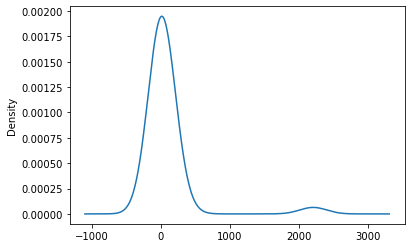

In [14]:
# Visualize the value counts
country_counts.plot.density()

In [15]:
# Determine which values to replace
replace_countries = list(country_counts[country_counts < 10].index)

# Replace in DataFrame
for country in replace_countries:
    merged_movies_df.country = merged_movies_df.country.replace(country,"Other")


# Check to make sure binning was successful
merged_movies_df.country.value_counts()

C:\Users\dtj13\anaconda3\envs\mlenv\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


United States     2201
United Kingdom     252
Other               64
Germany             59
France              52
Canada              50
Australia           20
China               14
Hong Kong           13
Name: country, dtype: int64

In [16]:
# Print out the Country value counts
company_counts = merged_movies_df.company.value_counts()
company_counts[0:50]

Warner Bros.                       207
Universal Pictures                 202
Columbia Pictures                  199
Paramount Pictures                 168
Twentieth Century Fox              137
New Line Cinema                     99
Walt Disney Pictures                69
Dreamworks Pictures                 58
Touchstone Pictures                 58
Metro-Goldwyn-Mayer (MGM)           50
Fox 2000 Pictures                   48
Summit Entertainment                42
Lionsgate                           41
Screen Gems                         39
Miramax                             34
Dimension Films                     33
TriStar Pictures                    30
Focus Features                      28
DreamWorks Animation                27
New Regency Productions             26
Revolution Studios                  25
Castle Rock Entertainment           25
Fox Searchlight Pictures            22
The Weinstein Company               18
Alcon Entertainment                 17
Hollywood Pictures       

<AxesSubplot:ylabel='Density'>

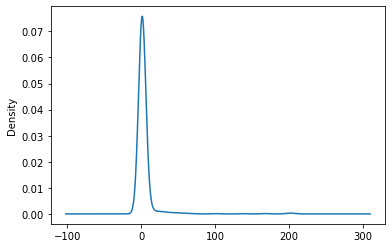

In [17]:
# visualize density plot of company counts
company_counts.plot.density()

In [18]:
# Determine which values to replace
replace_companies = list(company_counts[company_counts < 2].index)

# Replace in DataFrame
for company in replace_companies:
    merged_movies_df.company = merged_movies_df.company.replace(company,"Other")


# Check to make sure binning was successful
merged_movies_df.company.value_counts()

C:\Users\dtj13\anaconda3\envs\mlenv\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


Other                                     450
Warner Bros.                              207
Universal Pictures                        202
Columbia Pictures                         199
Paramount Pictures                        168
                                         ... 
Peters Entertainment                        2
Warner Independent Pictures (WIP)           2
Capella International                       2
British Broadcasting Corporation (BBC)      2
Amazon Studios                              2
Name: company, Length: 190, dtype: int64

In [19]:
# Print out the director value counts
director_counts = merged_movies_df.director.value_counts()
director_counts[0:50]

Clint Eastwood        21
Steven Spielberg      21
Ridley Scott          16
Tim Burton            16
Woody Allen           16
Ron Howard            14
Martin Scorsese       14
Robert Zemeckis       14
Steven Soderbergh     13
Antoine Fuqua         12
Renny Harlin          12
Tony Scott            11
Oliver Stone          11
Peter Berg            10
Barry Levinson        10
Shawn Levy            10
Michael Bay           10
Brian De Palma        10
Richard Donner        10
Joel Schumacher        9
John McTiernan         9
Spike Lee              9
David Fincher          9
Edward Zwick           9
Chris Columbus         9
Ivan Reitman           9
M. Night Shyamalan     9
Rob Reiner             8
Christopher Nolan      8
Sam Raimi              8
Brett Ratner           8
F. Gary Gray           8
Paul W.S. Anderson     8
Sam Mendes             8
Tom Shadyac            8
Todd Phillips          8
Robert Rodriguez       8
Adam Shankman          8
Roland Emmerich        7
Marc Forster           7


<AxesSubplot:ylabel='Density'>

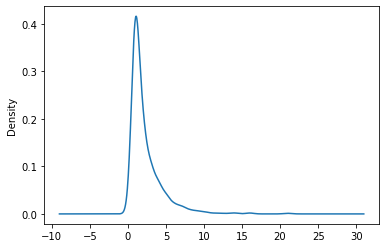

In [20]:
# visualize density plot of director counts
director_counts.plot.density()

In [21]:
# Determine which values to replace
replace_director = list(director_counts[director_counts < 3].index)

# Replace in DataFrame
for director in replace_director:
    merged_movies_df.director = merged_movies_df.director.replace(director,"Other")


# Check to make sure binning was successful
merged_movies_df.director.value_counts()

C:\Users\dtj13\anaconda3\envs\mlenv\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


Other               1058
Clint Eastwood        21
Steven Spielberg      21
Ridley Scott          16
Tim Burton            16
                    ... 
Howard Deutch          3
Gregory Hoblit         3
Tom Dey                3
Nora Ephron            3
David Leitch           3
Name: director, Length: 343, dtype: int64

In [22]:
# Print out the Country value counts
star_counts = merged_movies_df.star.value_counts()
star_counts[150:200]

Kate Beckinsale        5
Jude Law               5
Emily Blunt            5
Jet Li                 5
Kate Hudson            5
Adrien Brody           5
Naomi Watts            5
Robert Redford         5
John Goodman           5
Scarlett Johansson     5
Chadwick Boseman       4
James Marsden          4
Viggo Mortensen        4
Eddie Redmayne         4
Bill Paxton            4
Julianne Moore         4
David Arquette         4
Logan Lerman           4
Ryan Phillippe         4
Chloë Grace Moretz     4
Susan Sarandon         4
Dylan O'Brien          4
Chris Rock             4
Judi Dench             4
Shailene Woodley       4
Jennifer Garner        4
Barbra Streisand       4
Mia Wasikowska         4
Keira Knightley        4
Kate Winslet           4
Warren Beatty          4
Emma Roberts           4
Jay Baruchel           4
Chris Pratt            4
David Spade            4
Jennifer Aniston       4
Meg Ryan               4
Neve Campbell          4
Ray Romano             4
Danny Glover           4


<AxesSubplot:ylabel='Density'>

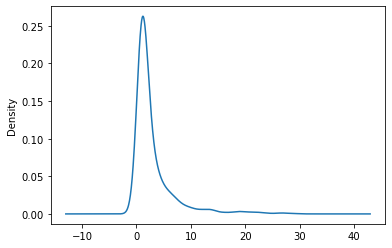

In [23]:
# vizualize density plot of star counts
star_counts.plot.density()

In [24]:
# Determine which values to replace
replace_star = list(star_counts[star_counts < 4].index)

# Replace in DataFrame
for star in replace_star:
    merged_movies_df.star = merged_movies_df.star.replace(star,"Other")


# Check to make sure binning was successful
merged_movies_df.star.value_counts()

C:\Users\dtj13\anaconda3\envs\mlenv\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


Other                  981
Robert De Niro          29
Bruce Willis            27
Denzel Washington       27
Tom Hanks               26
                      ... 
Jennifer Aniston         4
Christopher Lambert      4
Logan Lerman             4
Laurence Fishburne       4
Kevin Hart               4
Name: star, Length: 209, dtype: int64

In [25]:
# Print out the Country value counts
writer_counts = merged_movies_df.writer.value_counts()
writer_counts

Woody Allen         15
Stephen King        12
Ehren Kruger        10
Luc Besson          10
Gene Roddenberry     9
                    ..
Ellory Elkayem       1
Chuck Barris         1
Hayden Herrera       1
Mark Hanlon          1
Zara Hayes           1
Name: writer, Length: 1766, dtype: int64

<AxesSubplot:ylabel='Density'>

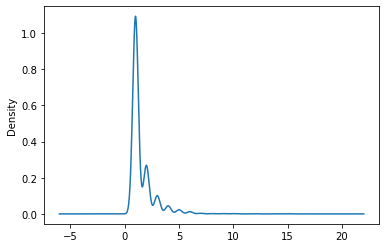

In [26]:
# vizualize density plot of writer counts
writer_counts.plot.density()

In [27]:
# Determine which values to replace
replace_writer = list(writer_counts[writer_counts < 2].index)

# Replace in DataFrame
for writer in replace_writer:
    merged_movies_df.writer = merged_movies_df.writer.replace(writer,"Other")


# Check to make sure binning was successful
merged_movies_df.writer.value_counts()

C:\Users\dtj13\anaconda3\envs\mlenv\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


Other             1243
Woody Allen         15
Stephen King        12
Luc Besson          10
Ehren Kruger        10
                  ... 
Chris Sanders        2
Elaine May           2
Jay Cocks            2
Ronald Harwood       2
Jennifer Lee         2
Name: writer, Length: 524, dtype: int64

In [28]:
# check number of unique variables in the categorical variables list
merged_movies_df[movies_cat].nunique()

rating        7
genre        14
score         2
director    343
writer      524
star        209
country       9
company     190
dtype: int64

In [27]:
# drop columns that wont be used in the model movie_name and release_date
merged_movies_df.drop(["movie_name", "release_date"], axis=1, inplace=False)
merged_movies_df

,rating,genre,year_release,score,votes,director,writer,star,country,budget,gross,company,runtime,production_budget,domestic_gross,worldwide_gross
0,R,Drama,1980,Favorable,927000.0,Other,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,19000000.0,44568631.0,45605374.0
5,R,Action,1980,Favorable,188000.0,Other,Other,Other,United States,27000000.0,115229890.0,Universal Pictures,133.0,27000000.0,57229890.0,57245093.0
6,R,Biography,1980,Favorable,330000.0,Martin Scorsese,Other,Robert De Niro,United States,18000000.0,23402427.0,Other,129.0,18000000.0,23380203.0,23380513.0
7,PG,Action,1980,Favorable,101000.0,Other,Jerry Siegel,Gene Hackman,United States,54000000.0,108185706.0,Dovemead Films,127.0,54000000.0,108185706.0,190400000.0
8,R,Biography,1980,Favorable,10000.0,Walter Hill,Other,Other,United States,10000000.0,15795189.0,United Artists,100.0,10000000.0,15198912.0,15198912.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5182,PG,Biography,2019,Favorable,8800.0,Other,Other,Other,United States,14000000.0,50444358.0,Fox 2000 Pictures,116.0,14000000.0,40713082.0,49231674.0
5183,PG-13,Comedy,2019,Favorable,4700.0,Other,Other,Diane Keaton,United Kingdom,10000000.0,16418218.0,Entertainment One,90.0,10000000.0,13631124.0,16463241.0
5193,PG-13,Action,2020,Favorable,387000.0,Christopher Nolan,Christopher Nolan,Other,United States,205000000.0,363656624.0,Warner Bros.,150.0,205000000.0,58456624.0,362403476.0
5198,PG,Adventure,2020,Unfavorable,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000.0,245487753.0,Universal Pictures,101.0,175000000.0,77047065.0,251409960.0


In [31]:
merged_movies_df = merged_movies_df.reset_index(drop=True)
merged_movies_df

,rating,genre,year_release,score,votes,director,writer,star,country,budget,gross,company,runtime,production_budget,domestic_gross,worldwide_gross
0,R,Drama,1980,Favorable,927000.0,Other,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,19000000.0,44568631.0,45605374.0
1,R,Action,1980,Favorable,188000.0,Other,Other,Other,United States,27000000.0,115229890.0,Universal Pictures,133.0,27000000.0,57229890.0,57245093.0
2,R,Biography,1980,Favorable,330000.0,Martin Scorsese,Other,Robert De Niro,United States,18000000.0,23402427.0,Other,129.0,18000000.0,23380203.0,23380513.0
3,PG,Action,1980,Favorable,101000.0,Other,Jerry Siegel,Gene Hackman,United States,54000000.0,108185706.0,Dovemead Films,127.0,54000000.0,108185706.0,190400000.0
4,R,Biography,1980,Favorable,10000.0,Walter Hill,Other,Other,United States,10000000.0,15795189.0,United Artists,100.0,10000000.0,15198912.0,15198912.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2720,PG,Biography,2019,Favorable,8800.0,Other,Other,Other,United States,14000000.0,50444358.0,Fox 2000 Pictures,116.0,14000000.0,40713082.0,49231674.0
2721,PG-13,Comedy,2019,Favorable,4700.0,Other,Other,Diane Keaton,United Kingdom,10000000.0,16418218.0,Entertainment One,90.0,10000000.0,13631124.0,16463241.0
2722,PG-13,Action,2020,Favorable,387000.0,Christopher Nolan,Christopher Nolan,Other,United States,205000000.0,363656624.0,Warner Bros.,150.0,205000000.0,58456624.0,362403476.0
2723,PG,Adventure,2020,Unfavorable,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000.0,245487753.0,Universal Pictures,101.0,175000000.0,77047065.0,251409960.0


In [32]:
# Generate our categorical variable list
movies_cat = merged_movies_df.dtypes[merged_movies_df.dtypes == "object"].index.tolist()

In [33]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(merged_movies_df[movies_cat]))

# Add the encoded variable names to the DataFrame
encode_df.columns = enc.get_feature_names(movies_cat)
encode_df

C:\Users\dtj13\anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,rating_G,rating_NC-17,rating_Not Rated,rating_PG,rating_PG-13,rating_R,rating_Unrated,genre_Action,genre_Adventure,genre_Animation,...,company_Walt Disney Animation Studios,company_Walt Disney Pictures,company_Warner Bros.,company_Warner Bros. Family Entertainment,company_Warner Independent Pictures (WIP),company_Weintraub Entertainment Group,company_Working Title Films,company_Worldview Entertainment,company_Zentropa Entertainments,company_Zoetrope Studios
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2720,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2721,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2722,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2723,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
# Merge one-hot encoded features and drop the originals
merged_movies_df = merged_movies_df.merge(encode_df, right_index=True, left_index=True)
merged_movies_df = merged_movies_df.drop(movies_cat,1)
merged_movies_df

C:\Users\dtj13\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,year_release,votes,budget,gross,runtime,production_budget,domestic_gross,worldwide_gross,rating_G,rating_NC-17,...,company_Walt Disney Animation Studios,company_Walt Disney Pictures,company_Warner Bros.,company_Warner Bros. Family Entertainment,company_Warner Independent Pictures (WIP),company_Weintraub Entertainment Group,company_Working Title Films,company_Worldview Entertainment,company_Zentropa Entertainments,company_Zoetrope Studios
0,1980,927000.0,19000000.0,46998772.0,146.0,19000000.0,44568631.0,45605374.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1980,188000.0,27000000.0,115229890.0,133.0,27000000.0,57229890.0,57245093.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1980,330000.0,18000000.0,23402427.0,129.0,18000000.0,23380203.0,23380513.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1980,101000.0,54000000.0,108185706.0,127.0,54000000.0,108185706.0,190400000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1980,10000.0,10000000.0,15795189.0,100.0,10000000.0,15198912.0,15198912.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2720,2019,8800.0,14000000.0,50444358.0,116.0,14000000.0,40713082.0,49231674.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2721,2019,4700.0,10000000.0,16418218.0,90.0,10000000.0,13631124.0,16463241.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2722,2020,387000.0,205000000.0,363656624.0,150.0,205000000.0,58456624.0,362403476.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2723,2020,53000.0,175000000.0,245487753.0,101.0,175000000.0,77047065.0,251409960.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
pd.set_option('max_columns', 400)
merged_movies_df

,year_release,votes,budget,gross,runtime,production_budget,domestic_gross,worldwide_gross,rating_G,rating_NC-17,rating_Not Rated,rating_PG,rating_PG-13,rating_R,rating_Unrated,genre_Action,genre_Adventure,genre_Animation,genre_Biography,genre_Comedy,genre_Crime,genre_Drama,genre_Family,genre_Fantasy,genre_Horror,genre_Mystery,genre_Romance,genre_Sci-Fi,genre_Thriller,score_Favorable,score_Unfavorable,director_Adam McKay,director_Adam Shankman,director_Adrian Lyne,director_Alan Parker,director_Albert Hughes,director_Alejandro G. Iñárritu,director_Alex Proyas,director_Alexander Payne,director_Alexandre Aja,director_Alfonso Cuarón,director_Amy Heckerling,director_Andrew Adamson,director_Andrew Davis,director_Andrew Fleming,director_Andrew Niccol,director_Andrew Stanton,director_Andrzej Bartkowiak,director_Andy Fickman,director_Andy Tennant,director_Ang Lee,director_Anne Fletcher,director_Anthony Minghella,director_Anthony Russo,director_Antoine Fuqua,director_Baltasar Kormákur,director_Barbra Streisand,director_Barry Levinson,director_Barry Sonnenfeld,director_Ben Affleck,director_Ben Stiller,director_Betty Thomas,director_Bill Condon,director_Bob Rafelson,director_Bobby Farrelly,director_Brad Bird,director_Brad Furman,director_Brad Silberling,director_Brett Ratner,director_Brian De Palma,director_Brian Helgeland,director_Brian Levant,director_Brian Robbins,director_Bryan Singer,director_Burr Steers,director_Cameron Crowe,director_Carl Franklin,director_Carlos Saldanha,director_Chris Columbus,director_Chris Wedge,director_Chris Weitz,director_Christopher Nolan,director_Chuck Russell,director_Clint Eastwood,director_Craig Gillespie,director_Curtis Hanson,director_D.J. Caruso,director_Danny Boyle,director_Danny Cannon,director_Danny DeVito,director_Darren Aronofsky,director_David Ayer,director_David Bowers,director_David Cronenberg,director_David Dobkin,director_David Fincher,director_David Frankel,director_David Gordon Green,director_David Koepp,director_David Leitch,director_David O. Russell,director_David R. Ellis,director_David Twohy,director_David Yates,director_David Zucker,director_Dean DeBlois,director_Dean Parisot,director_Denis Villeneuve,director_Dennie Gordon,director_Dennis Dugan,director_Denzel Washington,director_Directors,director_Dominic Sena,director_Don Bluth,director_Donald Petrie,director_Doug Liman,director_Edward Zwick,director_Eric Darnell,director_Ethan Coen,director_F. Gary Gray,director_Francis Ford Coppola,director_Francis Lawrence,director_Frank Coraci,director_Frank Darabont,director_Frank Marshall,director_Frank Oz,director_Garry Marshall,director_Gary Fleder,director_Gary Ross,director_Gavin Hood,director_Gavin O'Connor,director_Genndy Tartakovsky,director_George Clooney,director_George Miller,director_George P. Cosmatos,director_George Tillman Jr.,director_Glenn Ficarra,director_Gore Verbinski,director_Greg Mottola,director_Gregory Hoblit,director_Guillermo del Toro,director_Gus Van Sant,director_Guy Ritchie,director_Harold Becker,director_Harold Ramis,director_Howard Deutch,director_Hugh Wilson,director_Iain Softley,director_Irwin Winkler,director_Ivan Reitman,director_J.A. Bayona,director_J.J. Abrams,director_Jake Kasdan,director_James Bobin,director_James Cameron,director_James Foley,director_James Gray,director_James Mangold,director_James McTeigue,director_James Wan,director_James Wong,director_Jan de Bont,director_Jason Friedberg,director_Jason Reitman,director_Jaume Collet-Serra,director_Jay Chandrasekhar,director_Jay Roach,director_Jerry Zucker,director_Jodie Foster,director_Joe Carnahan,director_Joe Dante,director_Joe Johnston,director_Joe Wright,director_Joel Coen,director_Joel Schumacher,director_John Carpenter,director_John Dahl,director_John Frankenheimer,director_John Glen,director_John Hillcoat,director_John Lasseter,director_John Lee Hancock,director_John Madden,director_John McTiernan,director_John Moore,director_John Singleton,director_John Stockwell,director_John Wells,director_Jo

In [38]:
# Split our preprocessed data into our features and target arrays
y = merged_movies_df["score_Favorable"].values
X = merged_movies_df.drop(["score_Favorable","score_Unfavorable"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

C:\Users\dtj13\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [39]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [53]:
forest = RandomForestClassifier(random_state = 78, n_estimators = 10, min_samples_split = 2)
model = forest.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

In [76]:
score = balanced_accuracy_score(y_test, y_pred)
score
forest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 78,
 'verbose': 0,
 'warm_start': False}

In [55]:
from sklearn.model_selection import validation_curve
train_scoreNum, test_scoreNum = validation_curve(
                                RandomForestClassifier(),
                                X = X_train_scaled, y = y_train, 
                                param_name = 'n_estimators', 
                                param_range = [100, 300, 500, 750, 800, 1200], cv = 3)

In [58]:
train_scoreNum

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators':[10, 25, 50, 100, 300, 500, 800, 1200],
    'max_depth':[2, 3, 4, 5, 8, 15, 25, 30],
    'min_samples_split':[2, 5, 10, 15, 100],
    'min_samples_leaf':[1, 2, 5, 10],
    'max_features':['auto', 'sqrt', 'log2'],
    'criterion' :['gini', 'entropy']
}

gridF = GridSearchCV(estimator=forest, param_grid=param_grid, cv = 5, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 7680 candidates, totalling 38400 fits


In [75]:
sorted(gridF.cv_results_.keys())
['mean_fit_time', 'mean_score_time', 'mean_test_score',
 'std_fit_time', 'std_score_time', 'std_test_score']

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']